Hypothesis:

$$h_{\theta}(x) = \theta_0 + \theta_1 x$$

The $\theta$ values are parameters of the model. The question is how to choose the parameters. Different values result in different regression lines.


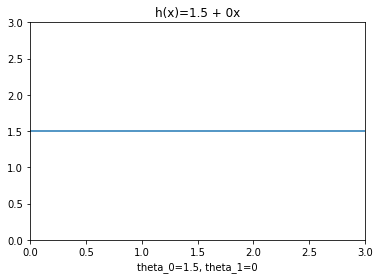

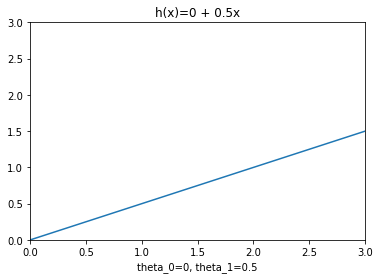

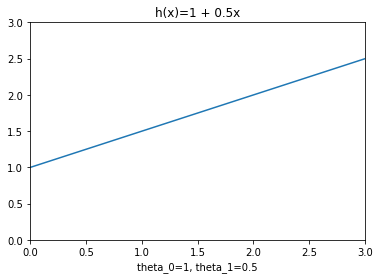

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def showplot(t0, t1):
    plt.plot([0,3], [t0, t0 + 3*t1])
    plt.xlabel("theta_0=" + str(t0) + ", theta_1=" + str(t1))
    plt.xlim([0,3])
    plt.ylim([0,3])
    plt.title("h(x)=" + str(t0) + " + " + str(t1) + "x")
    plt.show()
    
showplot(1.5, 0)
showplot(0, 0.5)
showplot(1, 0.5)

The idea is to choose $\theta_0, \theta_1$ so that $h_{\theta}(x)$ is close to $y$ for our training examples $(x, y)$.

$$\frac{\text{minimize}}{\theta_0, \theta_1} \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2$$

Why 1 over $2m$ instead of $m$? It makes the calculus easier, as shown later.

Keep in mind that $h_{\theta}(x) = \theta_0 + \theta_1 x^{(i)}$. 

The cost function is generally denoted by the letter $J$.

$$J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2$$

So the goal is:

$$\frac{\text{minimize}}{\theta_0, \theta_1} J(\theta_0, \theta_1)$$

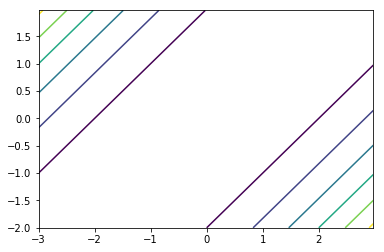

[1 2 3 4]


In [25]:
#Example of contour plot
x = np.arange(-3.0, 3.0, 0.025)
y = np.arange(-2.0, 2.0, 0.025)
X, Y = np.meshgrid(x, y)
# following three lines are from matplotlib's example
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X-1)**2 - (Y-1)**2)
Z = (Z1-Z2) * 2
# now try my own
Z = (X-Y)**2
plt.figure()
plt.contour(X, Y, Z)
plt.show()

#don't really understand how to do this yet, or for that matter, calculate Z when X and Y 
#are both parabolas in their own dimensions
#Duh. Z is the cost, the sum of squared errors, of two data sets x and y using a given set of weights



In [42]:
def cost(x, y, w):
    print(w[0], w[1], "ZZZ")
    yhat = y - (w[0] + w[1]*x)
    return np.dot(y, yhat)
x = np.array([1, 2, 3, 4])
y = np.array([1, 2, 3, 4])
theta0 = np.arange(-3, 3, 0.1)
theta1 = np.arange(3, 3, 0.1)
w = [0,0]
print(cost(x, y, [0,0]))
print(cost(x, y, [0, 1]))
Theta0, Theta1 = np.meshgrid(theta0, theta1)
print(x)
Z = cost(x, y, [theta0, theta1])
plt.contour(X, Y, Z)
plt.show()
#print(X)
#print(Y)
#print(Z)
#still not doing it. Oh well, moving on

(0, 0, 'ZZZ')
30
(0, 1, 'ZZZ')
0
[1 2 3 4]
(array([-3.00000000e+00, -2.90000000e+00, -2.80000000e+00, -2.70000000e+00,
       -2.60000000e+00, -2.50000000e+00, -2.40000000e+00, -2.30000000e+00,
       -2.20000000e+00, -2.10000000e+00, -2.00000000e+00, -1.90000000e+00,
       -1.80000000e+00, -1.70000000e+00, -1.60000000e+00, -1.50000000e+00,
       -1.40000000e+00, -1.30000000e+00, -1.20000000e+00, -1.10000000e+00,
       -1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01,  2.66453526e-15,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01,
        1.00000000e+00,  1.10000000e+00,  1.20000000e+00,  1.30000000e+00,
        1.40000000e+00,  1.50000000e+00,  1.60000000e+00,  1.70000000e+00,
        1.80000000e+00,  1.90000000e+00,  2.00000000e+00

ValueError: operands could not be broadcast together with shapes (0,) (4,) 

### Gradient descent algorithm
Repeat until convergence:
$$\theta_j =: \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1)$$
The updates to $\theta$ must be simultaneous. For example, if there are two $\theta$ values:
$$tmp_0 = \theta_0 - \alpha \frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1)$$
$$tmp_1 = \theta_1 - \alpha \frac{\partial}{\partial \theta_1} J(\theta_0, \theta_1)$$
$$\theta_0 = tmp_0$$
$$\theta_1 - tmp_1$$